In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [46]:
mZ0 = 91.1880E+9 # eV/c**2
mZ0_unc = 0.0020E+9 # eV/c**2
mW = 80.3692E+9 # eV/c**2
mW_unc = 0.0133E+9 # eV/c**2
mH = 125.20E+9 # eV/c**2
mH_unc = 0.11E+9 # eV/c**2
me = 0.51099895000E+6 # eV/c**2
me_unc = 0.00000000015E+6 # eV/c**2
mmu = 105.6583755E+6 # eV/c**2
mmu_unc = 0.0000023E+6 # eV/c**2
mtau = 1776.93E+6 # eV/c**2
mtau_unc = 0.09E+6 # eV/c**2

### Part 1: The Invariant Mass Distribution

In [47]:
# Loading the data
data = np.genfromtxt("atlas_z_to_ll.csv", delimiter = ',', skip_header = 1 , usecols=(0,1,2,3,4,5,6,7))

In [48]:
def momentum(x, phi, n, E):
    px = x*np.cos(phi)
    py = x*np.sin(phi)
    pz = x*np.sinh(n)
    return E, px, py, pz

def massfunc(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

In [49]:
pt1 = data[:,0]*10**9 # eV
pt2 = data[:,1]*10**9 # eV
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4] # rads
phi2 = data[:,5] # rads
E1 = data[:,6]*10**9 # eV
E2 = data[:,7]*10**9 # eV

In [50]:
particle1_E, particle1_px, particle1_py, particle1_pz = momentum(pt1, phi1, eta1, E1)
particle2_E, particle2_px, particle2_py, particle2_pz = momentum(pt2, phi2, eta2, E2)

In [51]:
p1_vec = np.array([particle1_E, particle1_px, particle1_py, particle1_pz])
p2_vec = np.array([particle2_E, particle2_px, particle2_py, particle2_pz])
pOG_vec = p1_vec + p2_vec
M_OG = np.sqrt(pOG_vec[0]**2 - (pOG_vec[1]**2 + pOG_vec[2]**2 + pOG_vec[3]**2))

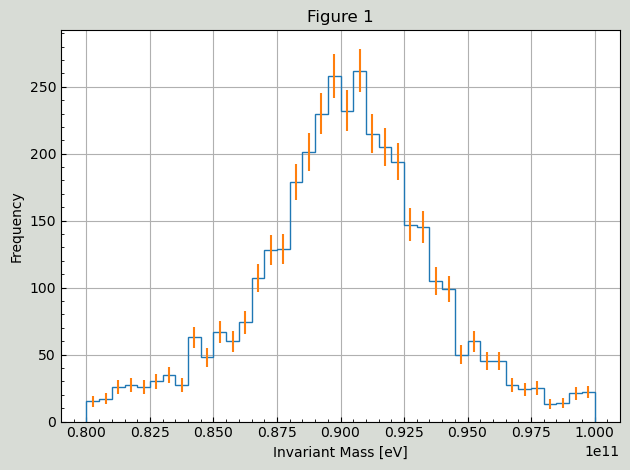

In [52]:
bins = np.linspace(80, 100, 41)*10**9
fig, ax = plt.subplots(1,1)
counts, bins1, edges = ax.hist(M_OG, bins=bins, label='Invariant Mass', histtype = 'step')
sigma = np.sqrt(counts)
bins_center = (bins1[:-1] + bins[1:])/2
ax.errorbar(
    x = bins_center,
    y = counts,
    yerr = sigma,
    ls = ''
)
ax.set_ylabel('Frequency')
ax.set_xlabel('Invariant Mass [eV]')
ax.set_title('Figure 1')
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
fig.set_facecolor('xkcd:light grey')
ax.grid()
fig.tight_layout()

In [53]:

mask = (bins_center > 87*10**9) & (bins_center < 93*10**9)
#print(mask)
xfit = bins_center[mask]
ycounts = counts[mask]
sigmafit = sigma[mask]
print(xfit)
print(ycounts)
print(sigmafit)

[8.725e+10 8.775e+10 8.825e+10 8.875e+10 8.925e+10 8.975e+10 9.025e+10
 9.075e+10 9.125e+10 9.175e+10 9.225e+10 9.275e+10]
[128. 129. 179. 201. 230. 258. 232. 262. 215. 205. 194. 147.]
[11.3137085  11.35781669 13.37908816 14.17744688 15.16575089 16.0623784
 15.23154621 16.18641406 14.6628783  14.31782106 13.92838828 12.12435565]


### Part 2: Breit-Wigner Fit

m0: 90.3 +- 0.1 GeV
gamma: 6.4 +- 0.2 GeV


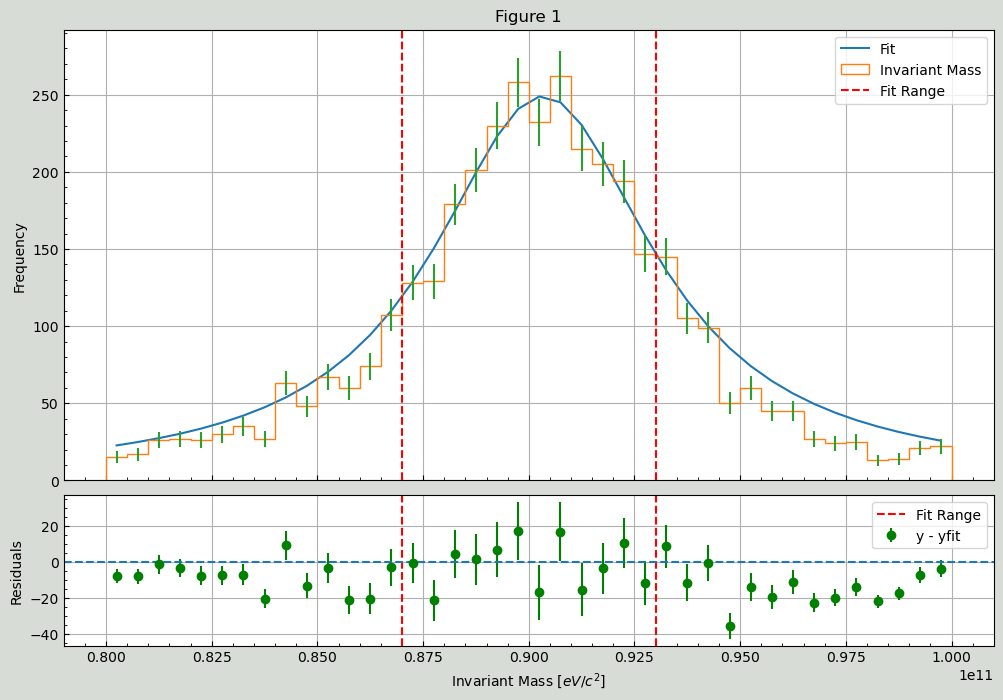

In [54]:
def decay(m, m0, gamma):
    Amp = 5000/2 *10**9
    D = Amp * np.pi**(-1) * (gamma/2)/((m-m0)**2 + (gamma/2)**2)
    return D

params, covar = curve_fit(
    f = decay,
    xdata = xfit,
    ydata = ycounts,
    sigma = sigmafit,
    absolute_sigma = True,
    p0 = [0.9E+11, 7*10**9] # Initial guess
)

m0_best = params[0] # mZ0
gamma_best = params[1] # Gamma
errs = np.sqrt(np.diag(covar))
print(f'm0: {np.round(m0_best/1E9,1)} +- {np.round(errs[0], -8)/1E9} GeV\ngamma: {np.round(gamma_best,-8)/1E9} +- {np.round(errs[1], -8)/1E9} GeV')
#Visualize the fit
yfit = decay(bins_center, m0_best, gamma_best)
difference = counts - yfit


fig, (ax, ax2) = plt.subplots(
    2, 1, sharex=True, figsize=(12,8),
    gridspec_kw={'height_ratios': [3,1], 'hspace' : 0.05})
ax.plot(bins_center, yfit, label = 'Fit')
counts, bins1, edges = ax.hist(M_OG, bins=bins, label='Invariant Mass', histtype = 'step')
sigma = np.sqrt(counts)
bins_center = (bins1[:-1] + bins[1:])/2
ax.errorbar(
    x = bins_center,
    y = counts,
    yerr = sigma,
    ls = ''
)

ax.set_ylabel('Frequency')
ax.set_title('Figure 1')
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.axvline(87E9, ls = '--', color = 'red', label = 'Fit Range')
ax.axvline(93E9, ls = '--', color = 'red')
ax2.axvline(87E9, ls = '--', color = 'red', label = 'Fit Range')
ax2.axvline(93E9, ls = '--', color = 'red')
ax2.errorbar(x=bins_center, y=difference, yerr=sigma, ls = '', marker = 'o', color = 'green', label = 'y - yfit')
ax2.set_ylabel('Residuals')
ax2.set_xlabel(r'Invariant Mass [$eV/c^2$]')
ax2.axhline(0, ls = '--')
ax2.minorticks_on() # Making it 'look nice'
ax2.tick_params(axis='both', which='major', direction='in')
ax2.tick_params(axis='both', which='minor', direction='in')
ax.legend()
ax.grid()
ax2.grid()
ax2.legend()
fig.set_facecolor('xkcd:light grey')
plt.savefig('Lab3Fig1.png', bbox_inches='tight')

In [55]:
#Since there are two variables in the fit, there are 2 fitting parameters
fitting_param = 2

def calc_chi2(obsv, obsv_err, pred, num_params):
    residual = np.power(obsv - pred, 2.) # YOU CAN REPLACE THE POWER FUNCTION WITH **
    unc_squared = np.power(obsv_err, 2.)
    ndof = len(obsv) - num_params
    chi2 = np.sum(residual / unc_squared)
    return chi2, chi2/ndof, ndof

chi2, red_chi2, dof = calc_chi2(ycounts, sigmafit, decay(xfit, m0_best, gamma_best), fitting_param)
p = stats.distributions.chi2.sf(chi2, dof)
print(f'm0: {np.round(m0_best,-8)/1E9} +- {np.round(errs[0], -8)/1E9} GeV\ngamma: {np.round(gamma_best,-8)/1E9} +- {np.round(errs[1], -8)/1E9} GeV')
print('X**2:',round(chi2, 1))
print('X**2/v:',round(red_chi2, 1))
print('p:', round(p, 1))

m0: 90.3 +- 0.1 GeV
gamma: 6.4 +- 0.2 GeV
X**2: 10.0
X**2/v: 1.0
p: 0.4


### Part 3: 2D Parameter Contours

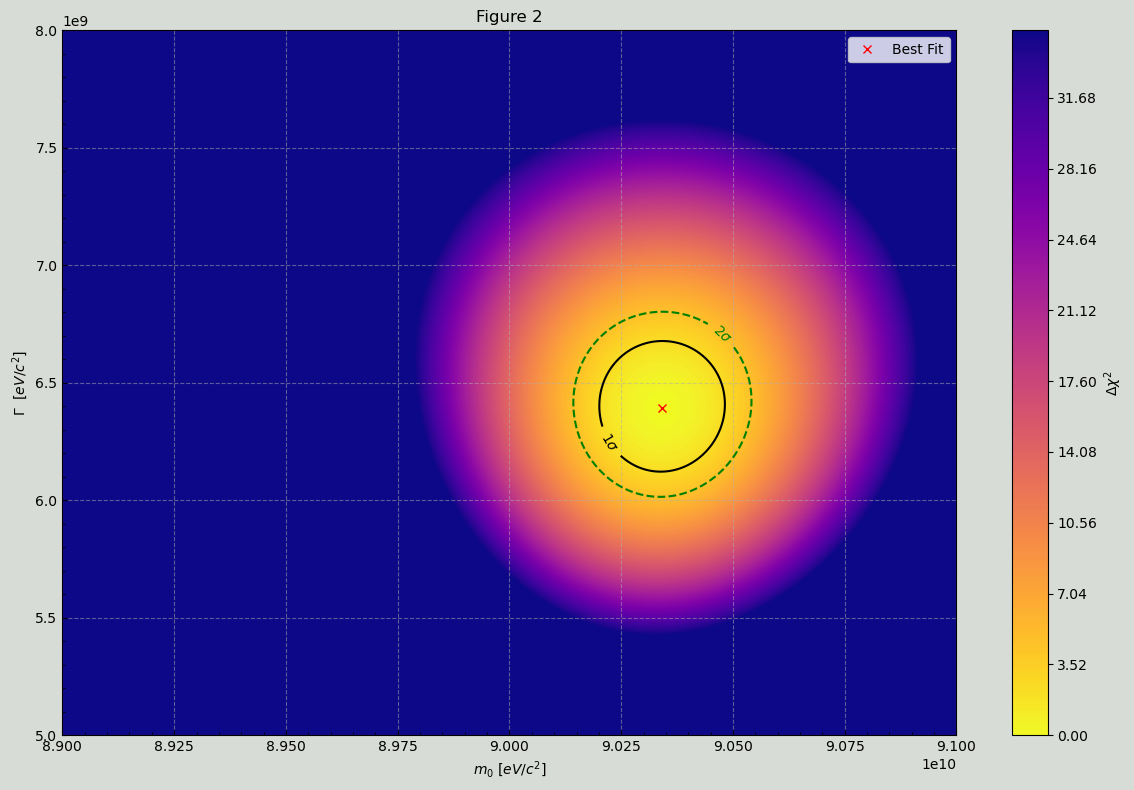

In [56]:
import matplotlib.cm as cm

n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
mZ0map = np.linspace(89E9, 91E9, n_bins)
gammamap = np.linspace(5E9, 8E9, n_bins)
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay(xfit, mZ0map[i], gammamap[j])
        chi2 = np.sum((theory-ycounts)**2/sigmafit**2)
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min + 35) # Clip to 35
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(mZ0map, gammamap)
fig2, ax2 = plt.subplots(1,1,figsize=(12,8))
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap=cm.plasma_r)
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label(r'$\Delta \chi^2$')
ax2.set_ylabel(r'$\Gamma$  $[eV/c^2]$')
ax2.set_xlabel(r'$m_0$ $[eV/c^2]$')
ax2.set_title('Figure 2')
ax2.plot(m0_best, gamma_best, ls = '', marker = 'x', color = 'red', label='Best Fit')
levels = {2.30:r'$1\sigma$', 4.61:r'$2\sigma$'}
CS = ax2.contour(X, Y, delta_chi_map, levels = levels.keys(), colors = ['Black', 'Green'],
                 linestyles=['solid', 'dashed'])
ax2.clabel(CS, levels = levels.keys(), fmt = levels, fontsize=10)
ax2.minorticks_on() # Making it 'look nice'
ax2.tick_params(axis='both', which='major', direction='in')
ax2.tick_params(axis='both', which='minor', direction='in')
ax2.legend()
ax2.grid(ls='--', alpha = 0.5)
fig2.set_facecolor('xkcd:light grey')
fig2.tight_layout()
plt.savefig('Lab3Fig2.png', bbox_inches='tight')

In [59]:
len(ycounts)

12